# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

**Описание данных**

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м) 
- `balcony` — число балконов 
- `ceiling_height` — высота потолков (м) 
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении



### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/real_estate_data.csv', sep='\t')
pd.options.display.float_format = '{:,.1f}'.format

In [3]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.0",108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,"18,863.0","16,028.0",1.0,482.0,2.0,755.0,NaN
1,7,"3,350,000.0",40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,"12,817.0","18,603.0",0.0,NaN,0.0,NaN,81.0
2,10,"5,196,000.0",56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,"21,741.0","13,933.0",1.0,90.0,2.0,574.0,558.0
3,0,"64,900,000.0",159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,"28,098.0","6,800.0",2.0,84.0,3.0,234.0,424.0
4,2,"10,000,000.0",100.0,2018-06-19T00:00:00,2,3.0,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,"31,856.0","8,098.0",2.0,112.0,1.0,48.0,121.0
5,10,"2,890,000.0",30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,"3,700,000.0",37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,...,14.4,1.0,посёлок Парголово,"52,996.0","19,143.0",0.0,NaN,0.0,NaN,155.0
7,5,"7,915,000.0",71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,"23,982.0","11,634.0",0.0,NaN,0.0,NaN,NaN
8,20,"2,900,000.0",33.2,2018-05-23T00:00:00,1,NaN,27.0,15.4,26,NaN,...,8.8,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,"5,400,000.0",61.0,2017-02-26T00:00:00,3,2.5,9.0,43.6,7,NaN,...,6.5,2.0,Санкт-Петербург,"50,898.0","15,008.0",0.0,NaN,0.0,NaN,289.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

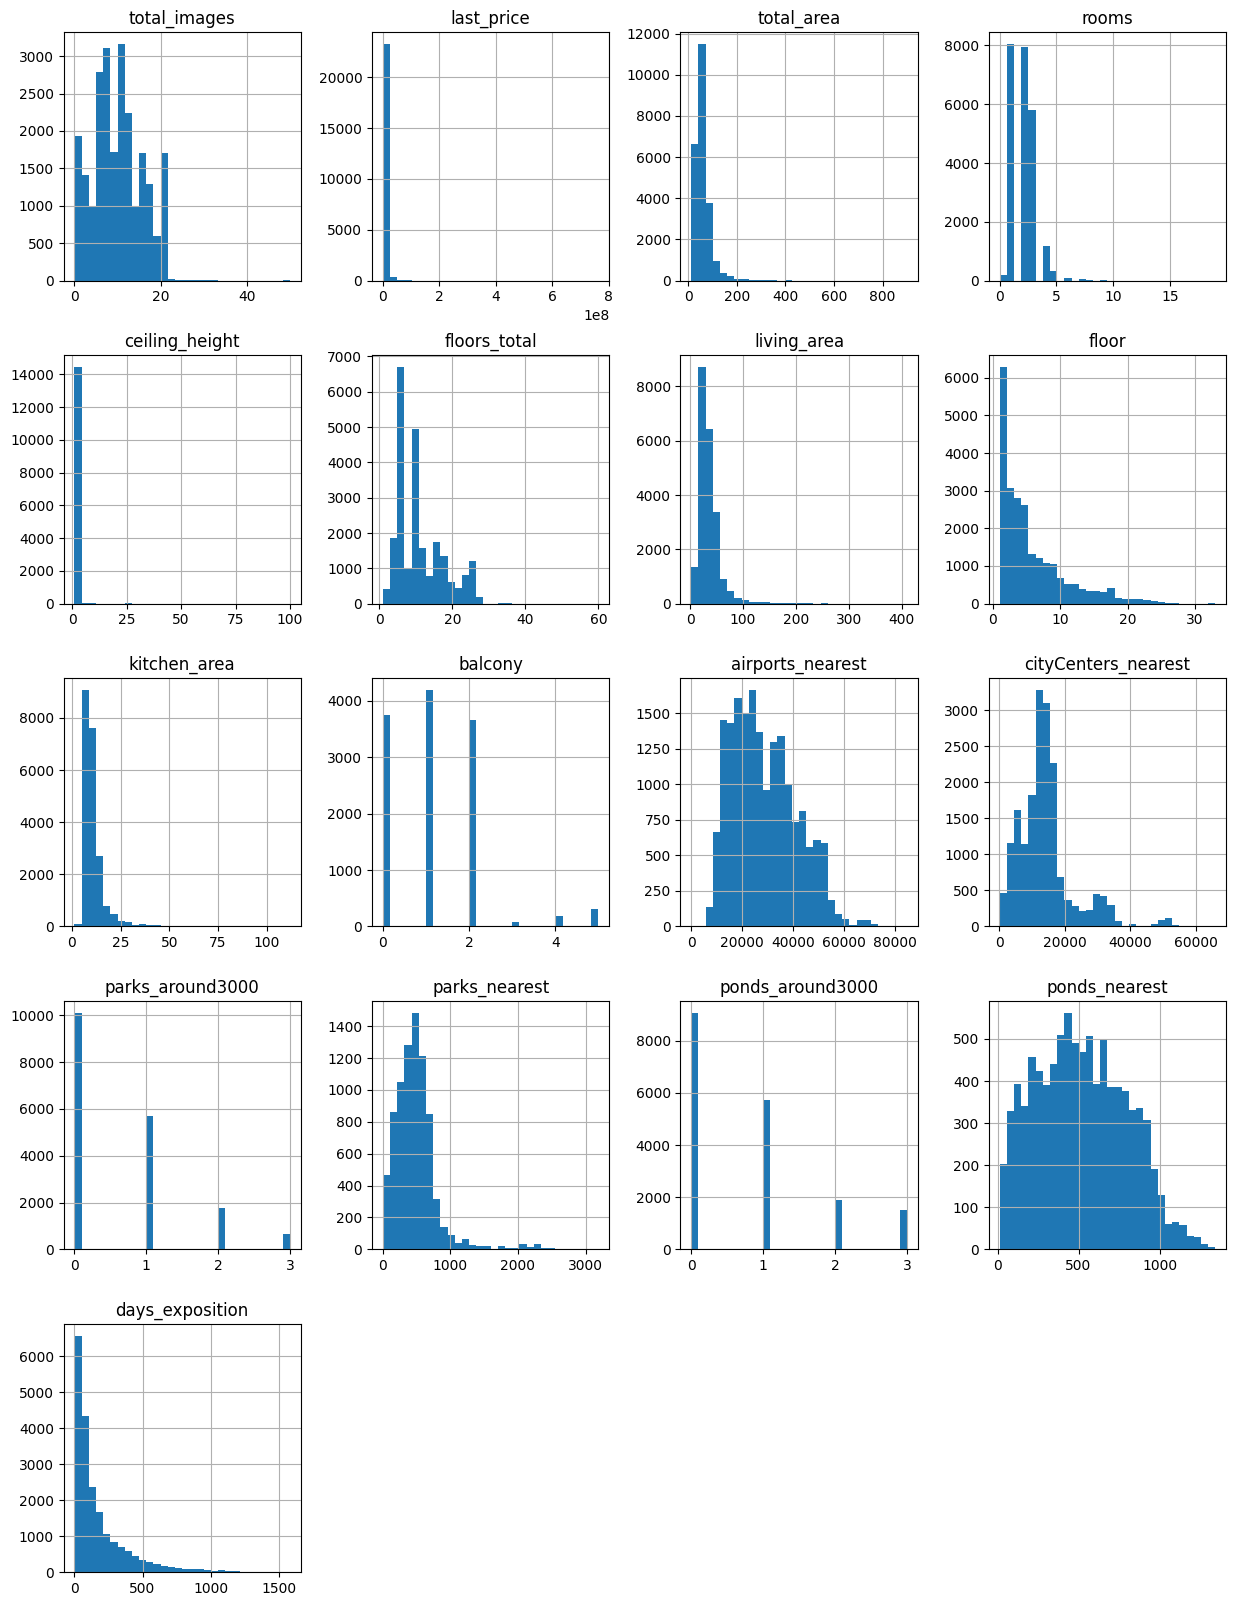

In [5]:
data.hist(bins=30, figsize=(15,20));

In [6]:
data[data['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,"11,640,000.0",65.2,2018-10-02T00:00:00,2,NaN,NaN,30.8,4,NaN,...,12.0,NaN,Санкт-Петербург,"39,197.0","12,373.0",1.0,123.0,0.0,NaN,49.0
237,4,"2,438,033.0",28.1,2016-11-23T00:00:00,1,NaN,NaN,20.8,1,NaN,...,NaN,0.0,Санкт-Петербург,"22,041.0","17,369.0",0.0,NaN,1.0,374.0,251.0
457,4,"9,788,348.0",70.8,2015-08-01T00:00:00,2,NaN,NaN,38.4,12,NaN,...,10.6,0.0,Санкт-Петербург,"37,364.0","8,322.0",2.0,309.0,2.0,706.0,727.0
671,4,"6,051,191.0",93.6,2017-04-06T00:00:00,3,NaN,NaN,47.1,8,NaN,...,16.8,0.0,Санкт-Петербург,"22,041.0","17,369.0",0.0,NaN,1.0,374.0,123.0
1757,5,"3,600,000.0",39.0,2017-04-22T00:00:00,1,NaN,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,"22,735.0","11,618.0",1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,"8,500,000.0",63.5,2017-05-24T00:00:00,2,2.8,NaN,NaN,3,NaN,...,NaN,NaN,Санкт-Петербург,"51,340.0","15,363.0",0.0,NaN,1.0,853.0,512.0
22656,4,"4,574,160.0",64.5,2017-04-02T00:00:00,2,NaN,NaN,31.7,20,NaN,...,14.4,0.0,Санкт-Петербург,"22,041.0","17,369.0",0.0,NaN,1.0,374.0,127.0
22808,0,"14,569,263.0",110.4,2016-11-20T00:00:00,3,NaN,NaN,45.4,6,NaN,...,23.4,0.0,Санкт-Петербург,"19,095.0","4,529.0",0.0,NaN,0.0,NaN,260.0
23590,0,"21,187,872.0",123.3,2017-04-25T00:00:00,3,NaN,NaN,50.4,18,NaN,...,23.6,0.0,Санкт-Петербург,"19,095.0","4,529.0",0.0,NaN,0.0,NaN,104.0


In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Пропущенные значения:**
- в столбце ***is_apartment*** скорее всего пропуски данных говорят о том, что это не апартаменты
- в ***ceiling_height*** пропущена высота потолков вероятно из-за отсутствия информации
- ***living_area***: жилая площадь в некоторых позициях не заполнена, необходимо проверить заполнена ли в них ***total_area***
- ***kitchen_area***: то же, что и с жилой площадью, но даже если заполнена общая площадь,, площадь кухни важна.
  (*Если не хватает данных о площади одного из помещений, можно произвести расчет*)
- значения, пропущенные в ***balcony***, говорят о том, что балкона нет
- ***locality_name***: 49 пропусков. Можно просмотреть вручную
- незаполненный ближайщий аэропорт (***airports_nearest***) вероятнее всего говорит о том, что аэропорт слишком далеко.
- и ближайший аэропорт и данные о парках и водоемах могут также быть пропущены по одинаковой причине, т.к. количество пропусков очень близко
- ***days_exposition***: возможно кто-то реагировал на объявление меньше, чем за полный день, но это надо проверять

In [8]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

**В названиях населенных пунктов присутствуют неявные дубликаты.**

Например: "посёлок", "поселок городского типа", "село" и "поселок". Некоторые населенные пункты указаны как с видом так и без, например "посёлок Мурино" и "Мурино". 

### Выполните предобработку данных

Исправление аномалий в столбце ***ceiling_height***:

In [9]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [10]:
data['ceiling_height'] = data['ceiling_height'].replace(
    {25: 2.5, 20: 2.0, 14: 1.4, 24: 2.4, 27: 2.7, 100: 10, 26: 2.6, 32: 3.2, 22.6: 2.26, 27.5: 2.75})

Замена типа данных в столбце ***first_day_exposition***

Необходимо для извлечения данных по дате

In [11]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Замена пропусков значений в столбце ***balcony*** на ***0***, заменим тип данных на ***int*** (не может быть половины балкона):

In [12]:
data['balcony'] = data['balcony'].fillna(value=0)
data['balcony'] = data['balcony'].astype('int')

Замена пропусков значений в столбце ***is_apartment*** на ***False***:

In [13]:
data['is_apartment'] = data['is_apartment'].fillna(value=False).astype(bool)

/tmp/ipykernel_96830/2918262998.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['is_apartment'] = data['is_apartment'].fillna(value=False).astype(bool)


Замена пропусков значений этажности здания на этаж объекта, т.к. на ноль заменить нельзя, средним значением тоже заменить нельзя, вычислить количество этажей по другим признакам нет возможности. Пропусков значений - 86, что незначительно скажется на результатах. 
Замена типа данных в ***floors_total*** на ***int***

In [14]:
data['floors_total'] = data['floors_total'].fillna(value=data['floor'])
data['floors_total'] = data['floors_total'].astype('int')

Замена типа данных в столбце ***last_price***

In [15]:
data['last_price'] = data['last_price'].astype('int')

Заполнение пропусков в столбце ***locality_name***:
- объекты недвижимости с расстоянием не более 12 км до Центра отнесем к Санкт-Петербургу;
- косвенные признаки (точное расстояние до аэропорта и до ближайшего водоема) говорят об одном ЖК или даже доме
- те объекты, локацию которых неопределить обозначим как ***неизвестный***

In [16]:
data.loc[(data['cityCenters_nearest'] < 12000), 'locality_name'] = data['locality_name'].fillna(value='Санкт-Петербург')
data.loc[(data['ponds_nearest'] == 374) & (data['airports_nearest'] == 22041), 'locality_name'] \
        = data['locality_name'].fillna(value='Санкт-Петербург')
data['locality_name'] = data['locality_name'].fillna(value='неизвестный')

**Устранение неявных дубликатов в названии населенных пунктов** (***locality_name***):

In [17]:
# Отдельным циклом перебираем название н.п. и меняем "поселок" на "посёлок":
for name in range(data['locality_name'].count()):
    if 'поселок' in  data.loc[name, 'locality_name']:
        data.loc[name, 'locality_name'] = data.loc[name, 'locality_name'].replace('поселок', 'посёлок')
# Обрабатываем остальные неявные дубликаты:
for name in range(data['locality_name'].count()):
    if 'посёлок городского типа' in data.loc[name, 'locality_name']:
        data.loc[name, 'locality_name'] = data.loc[name, 'locality_name'].replace('посёлок городского типа', 'посёлок')
    elif 'городской посёлок' in data.loc[name, 'locality_name']:
        data.loc[name, 'locality_name'] = data.loc[name, 'locality_name'].replace('городской посёлок', 'посёлок')
    elif 'посёлок при железнодорожной станции' in data.loc[name, 'locality_name']:
        data.loc[name, 'locality_name'] = data.loc[name, 'locality_name'].replace('посёлок при железнодорожной станции', 'посёлок')
    elif 'посёлок станции' in data.loc[name, 'locality_name']:
        data.loc[name, 'locality_name'] = data.loc[name, 'locality_name'].replace('посёлок станции', 'посёлок')
    elif 'коттеджный посёлок' in data.loc[name, 'locality_name']:
        data.loc[name, 'locality_name'] = data.loc[name, 'locality_name'].replace('коттеджный посёлок', 'посёлок')
    elif 'садовое товарищество' in data.loc[name, 'locality_name']:
        data.loc[name, 'locality_name'] = data.loc[name, 'locality_name'].replace('садовое товарищество', 'посёлок')
    elif 'Мурино' in data.loc[name, 'locality_name']:
        data.loc[name, 'locality_name'] = data.loc[name, 'locality_name'].replace('посёлок ', '')
    elif 'Кудрово' in data.loc[name, 'locality_name']:
        data.loc[name, 'locality_name'] = data.loc[name, 'locality_name'].replace('деревня ', '')
    elif 'село' in data.loc[name, 'locality_name']:
        data.loc[name, 'locality_name'] = data.loc[name, 'locality_name'].replace('село', 'посёлок')
    elif 'Любань' in data.loc[name, 'locality_name']:
        data.loc[name, 'locality_name'] = data.loc[name, 'locality_name'].replace('посёлок ', '')
    elif 'посёлок Коммунары' in data.loc[name, 'locality_name']:
        data.loc[name, 'locality_name'] = data.loc[name, 'locality_name'].replace('посёлок Коммунары', 'Коммунар')
    elif 'посёлок Никольское' in data.loc[name, 'locality_name']:
        data.loc[name, 'locality_name'] = data.loc[name, 'locality_name'].replace('посёлок Никольское', 'Никольское')

**Заполнение пропусков расстояния до аэропорта:**

- для Санкт-Петербурга возьмем среднее расстояние;
- для остальных населенных пунктов заполним вручную.

In [18]:
data[(data['airports_nearest'].isna()) & (data['days_exposition'].isna()) & (data['ceiling_height'].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
81,9,10949000,68.0,2018-12-27,1,NaN,10,NaN,6,False,...,NaN,0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,11,2400000,43.9,2019-03-13,2,NaN,2,27.5,1,False,...,5.2,0,Кировск,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,0,1700000,33.1,2019-04-09,1,NaN,5,18.4,1,False,...,6.4,0,посёлок Лебяжье,NaN,NaN,NaN,NaN,NaN,NaN,NaN
151,15,2950000,44.9,2019-03-20,2,NaN,5,28.0,3,False,...,5.4,1,посёлок Аннино,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,1,4600000,83.7,2019-04-29,4,NaN,17,40.6,7,False,...,21.4,0,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23303,14,2750000,73.0,2018-09-12,4,NaN,5,47.0,1,False,...,8.2,0,деревня Лампово,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23584,17,2450000,66.0,2019-04-03,3,NaN,5,NaN,1,False,...,8.0,0,посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23643,1,660000,45.0,2019-02-19,2,NaN,5,31.0,4,False,...,6.0,1,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23651,7,3350000,41.0,2018-12-17,1,NaN,6,18.0,1,False,...,12.0,0,посёлок Токсово,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
data[(data['airports_nearest'].isna()) & (data['locality_name'] == 'Санкт-Петербург')]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
81,9,10949000,68.0,2018-12-27,1,NaN,10,NaN,6,False,...,NaN,0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593,20,4200000,38.3,2019-04-16,1,2.6,16,19.8,10,False,...,10.1,2,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
604,11,9899000,101.0,2018-12-12,3,3.0,5,62.0,3,False,...,15.0,0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
733,18,18700000,109.7,2018-02-03,3,2.8,21,57.2,13,False,...,15.3,1,Санкт-Петербург,NaN,"13,355.0",1.0,735.0,0.0,NaN,112.0
742,7,37000000,161.0,2016-05-22,3,NaN,9,84.0,8,False,...,NaN,0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,402.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21955,19,130000000,431.0,2017-10-02,7,3.7,8,220.0,5,False,...,20.0,5,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,161.0
22554,5,3415000,31.6,2019-04-16,1,NaN,24,NaN,14,False,...,8.7,2,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22628,8,8600000,74.9,2019-03-14,3,3.0,5,53.2,4,False,...,8.0,1,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22790,8,5600000,47.0,2017-09-27,1,NaN,23,21.0,7,False,...,11.0,1,Санкт-Петербург,NaN,"13,355.0",1.0,735.0,0.0,NaN,10.0


In [20]:
data.loc[(data['locality_name'] == 'Гатчина'), ['airports_nearest']] = data['airports_nearest'].fillna(value=32000.0)
data.loc[(data['locality_name'] == 'Сертолово'), ['airports_nearest']] = data['airports_nearest'].fillna(value=57000.0)
data.loc[(data['locality_name'] == 'Мурино'), ['airports_nearest']] = data['airports_nearest'].fillna(value=46000.0)
data.loc[(data['locality_name'] == 'Кудрово'), ['airports_nearest']] = data['airports_nearest'].fillna(value=27000.0)
data.loc[(data['locality_name'] == 'Всеволожск'), ['airports_nearest']] = data['airports_nearest'].fillna(value=47000.0)
data.loc[(data['locality_name'] == 'Выборг'), ['airports_nearest']] = data['airports_nearest'].fillna(value=173000.0)
data.loc[(data['locality_name'] == 'деревня Новое Девяткино'), ['airports_nearest']] = data['airports_nearest'].fillna(value=46000.0)
data.loc[(data['locality_name'] == 'Кириши'), ['airports_nearest']] = data['airports_nearest'].fillna(value=152000.0)
data.loc[(data['locality_name'] == 'посёлок Бугры'), ['airports_nearest']] = data['airports_nearest'].fillna(value=49000.0)
data.loc[(data['locality_name'] == 'Сланцы'), ['airports_nearest']] = data['airports_nearest'].fillna(value=178000.0)
data.loc[(data['locality_name'] == 'Волхов'), ['airports_nearest']] = data['airports_nearest'].fillna(value=138000.0)
data.loc[(data['locality_name'] == 'Кингисепп'), ['airports_nearest']] = data['airports_nearest'].fillna(value=124000.0)
data.loc[(data['locality_name'] == 'Тосно'), ['airports_nearest']] = data['airports_nearest'].fillna(value=51000.0)
data.loc[(data['locality_name'] == 'Сосновый Бор'), ['airports_nearest']] = data['airports_nearest'].fillna(value=94000.0)
data.loc[(data['locality_name'] == 'Никольское'), ['airports_nearest']] = data['airports_nearest'].fillna(value=38000.0)
data.loc[(data['locality_name'] == 'Коммунар'), ['airports_nearest']] = data['airports_nearest'].fillna(value=28000.0)
data.loc[(data['locality_name'] == 'Кировск'), ['airports_nearest']] = data['airports_nearest'].fillna(value=55000.0)
data.loc[(data['locality_name'] == 'Отрадное'), ['airports_nearest']] = data['airports_nearest'].fillna(value=40000.0)
data.loc[(data['locality_name'] == 'посёлок Янино-1'), ['airports_nearest']] = data['airports_nearest'].fillna(value=31000.0)
data.loc[(data['locality_name'] == 'Приозерск'), ['airports_nearest']] = data['airports_nearest'].fillna(value=174000.0)
data.loc[(data['locality_name'] == 'Шлиссельбург'), ['airports_nearest']] = data['airports_nearest'].fillna(value=57000.0)
data.loc[(data['locality_name'] == 'Луга'), ['airports_nearest']] = data['airports_nearest'].fillna(value=137000.0)
data.loc[(data['locality_name'] == 'Тихвин'), ['airports_nearest']] = data['airports_nearest'].fillna(value=226000.0)
data.loc[(data['locality_name'] == 'деревня Старая'), ['airports_nearest']] = data['airports_nearest'].fillna(value=39000.0)
data.loc[(data['locality_name'] == 'посёлок Тельмана'), ['airports_nearest']] = data['airports_nearest'].fillna(value=29000.0)
data.loc[(data['locality_name'] == 'посёлок Рощино'), ['airports_nearest']] = data['airports_nearest'].fillna(value=86000.0)
data.loc[(data['locality_name'] == 'посёлок Романовка'), ['airports_nearest']] = data['airports_nearest'].fillna(value=52000.0)
data.loc[(data['locality_name'] == 'Волосово'), ['airports_nearest']] = data['airports_nearest'].fillna(value=76000.0)
data.loc[(data['locality_name'] == 'Красное Село'), ['airports_nearest']] = data['airports_nearest'].fillna(value=26000.0)

**Проверка пропусков:**

In [21]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total                0
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name               0
airports_nearest         1636
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Удаление строки объекта с аномально низкой стоимостью:**

In [22]:
data.drop(data.loc[data['last_price'] == 12190].index, inplace=True)

### Добавьте в таблицу новые столбцы

**Создание столбца со стоимостью одного квадратного метра**

In [23]:
data['price_sq_meter'] = (data['last_price'] / data['total_area']).astype('int')

**Создание столбца с днем публикации объявления**

In [24]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

**Создание столбца с месяцем публикаци объявления**

In [25]:
data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month

**Создание столбца с годом публикаци объявления**

In [26]:
data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year

**Создание столбца с типом этажа квартиры (значения — «первый», «последний», «другой»)**

In [27]:
def floor_type_count(data):
    floor = data['floor']
    all_floors = data['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == all_floors:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_type_count, axis=1)

**Создание столбца с расстоянием до Центра в километрах**

In [28]:
data['to_cityCenter_km'] = (data['cityCenters_nearest'] / 1000).round()

**Проверка полученной таблицы:**

In [29]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sq_meter,weekday_exposition,month_exposition,year_exposition,floor_type,to_cityCenter_km
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120370,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,NaN,0.0,NaN,81.0,82920,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92785,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,84.0,3.0,234.0,424.0,408176,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,False,...,112.0,1.0,48.0,121.0,100000,1,6,2018,другой,8.0


**Описание параметров:**

 - **общая площадь:**
   полная площадь жилья, включающая все помещения. Не имеет пропусков значений.
 - **жилая площадь:**
   имеет подозрительные значения - 2, 3 кв.м., но в незначительном количестве. Имеет пропуски, которые не заполнить.
 - **площадь кухни:**
   имеет подозрительное значение - 1,3. Имеет пропуски, которые не заполнить.
 - **цена объекта:**
   финальная стоимость объекта. Основной параметр, по которому проводится анализ.
 - **количество комнат:**
   максимальное количество - 19
 - **высота потолков:**
   изначально имелись ошибки в данных, исправлено
 - **тип этажа квартиры («первый», «последний», «другой»):**
   новый столбец 
 - **общее количество этажей в доме:**
   максимально высокий дом - 60 этажей, что вызывает подозрения. Высота дома в 52 этажа тоже сомнительна. 
   Минимальная этажность - 1 этаж.
 - **расстояние до центра города в метрах:**
   максимальное 65968 м., минимальное - 181 м.
 - **расстояние до ближайшего парка:**
   максимальное расстояние - 3190 м., минимальное - 1 м. 
   
   ---
   ---

### Проведите исследовательский анализ данных

**Построение гистограмм по основным параметрам:**

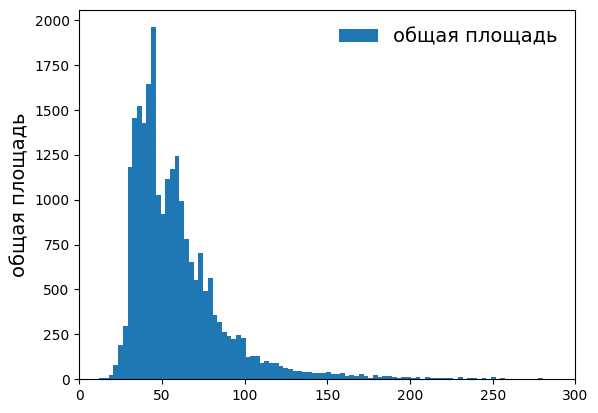

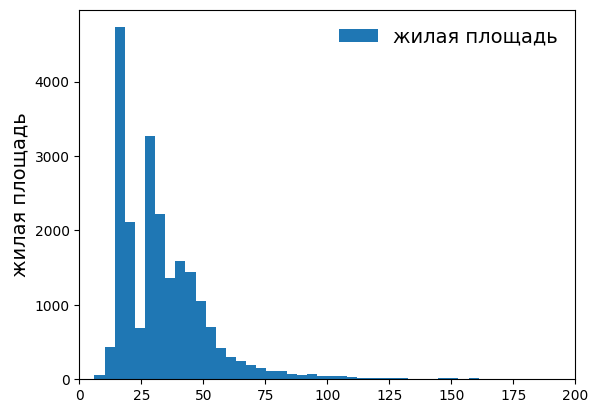

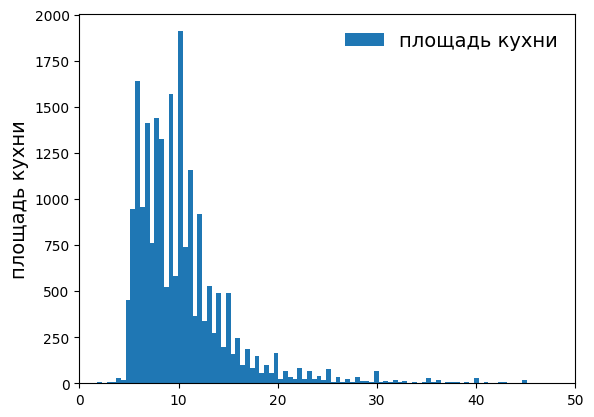

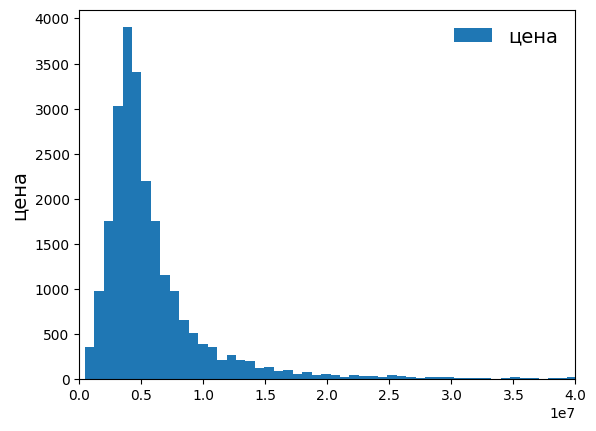

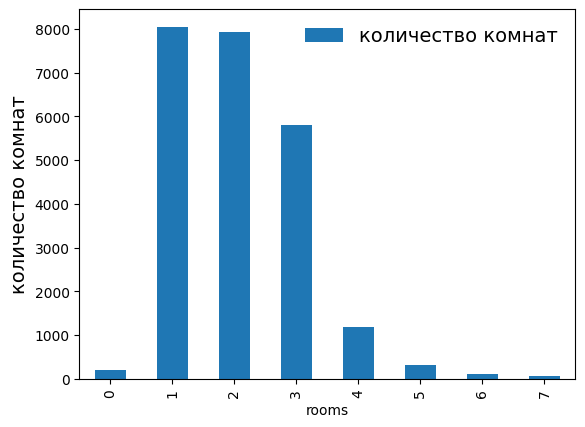

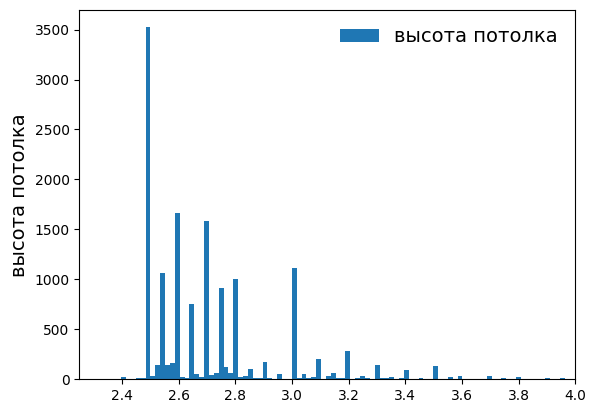

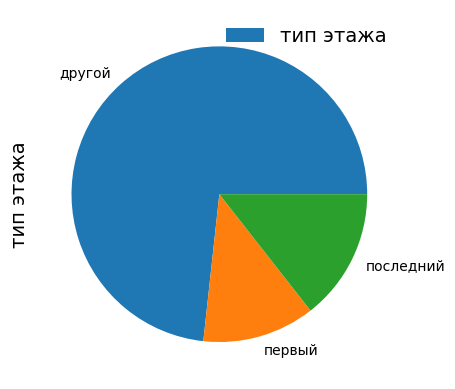

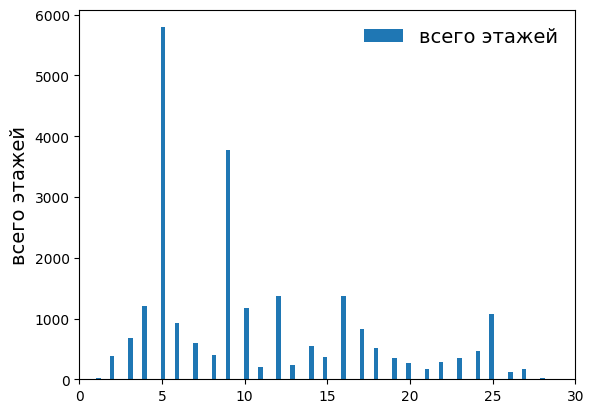

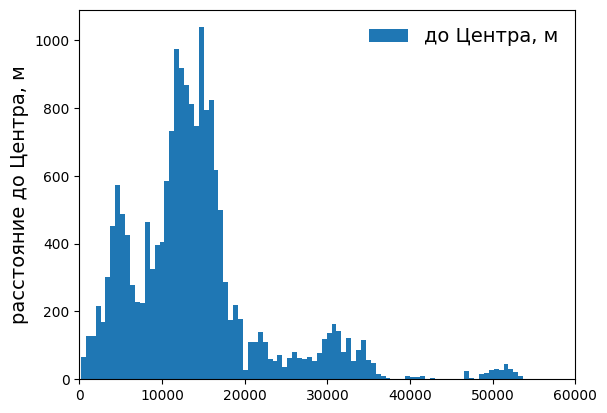

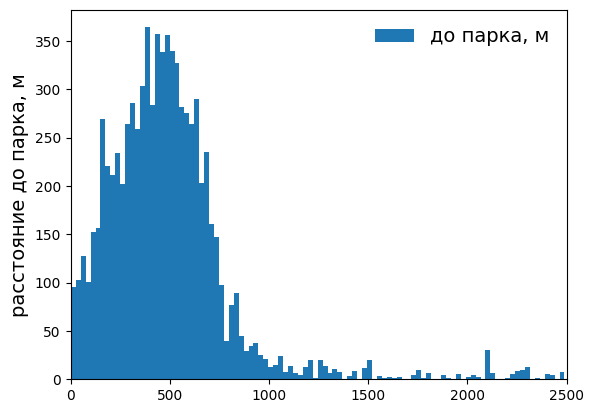

In [30]:
# Гистограмма "общая площадь":
(
    data.query('total_area < 300')
    .plot(y='total_area', kind='hist', bins=100, xlim=(0, 300))
)
plt.legend(['общая площадь'], frameon=False, fontsize=14)
plt.ylabel('общая площадь', fontsize=14)
plt.show()

# Гистограмма "жилая площадь":
data.plot(y='living_area', kind='hist', bins=100, xlim=(0, 200))
plt.legend(['жилая площадь'], frameon=False, fontsize=14)
plt.ylabel('жилая площадь', fontsize=14)
plt.show()

# Гистограмма "площадь кухни"
(
    data.query('kitchen_area < 50')
    .plot(y='kitchen_area', kind='hist', bins=100, xlim=(0, 50))
)
plt.legend(['площадь кухни'], frameon=False, fontsize=14)
plt.ylabel('площадь кухни', fontsize=14)
plt.show()

# Гистограмма "цена":
data.plot(y='last_price', kind='hist', bins=1000, xlim=(0, 40000000))
plt.legend(['цена'], frameon=False, fontsize=14)
plt.ylabel('цена', fontsize=14)
plt.show()

# Гистограмма "количество комнат"
(
    data.query('rooms < 8')
    .pivot_table(index='rooms', values='total_area', aggfunc='count')
    .plot(y='total_area', kind='bar', xlim=(0, 9))
)
plt.legend(['количество комнат'], frameon=False, fontsize=14)
plt.ylabel('количество комнат', fontsize=14)
plt.show()

# Гистограмма "высота потолка":
(
    data.query('2.25 < ceiling_height < 4')
    .plot(y='ceiling_height', kind='hist', bins=100, xlim=(2.25, 4))
)
plt.legend(['высота потолка'], frameon=False, fontsize=14)
plt.ylabel('высота потолка', fontsize=14)
plt.show()

# Гистограмма "тип этажа":
(
    data.pivot_table(index='floor_type', values='floor', aggfunc='count')
    .plot(y='floor', kind='pie')
)
plt.legend(['тип этажа'], frameon=False, fontsize=14)
plt.ylabel('тип этажа', fontsize=14)
plt.show()

# Гистограмма "общее количество этажей в доме":
(
    data.query('floors_total < 30')
    .plot(y='floors_total', kind='hist', bins=100, xlim=(0, 30))
)
plt.legend(['всего этажей'], frameon=False, fontsize=14)
plt.ylabel('всего этажей', fontsize=14)
plt.show()

# Гистограмма "расстояние до Центра города в метрах":
(
    data.query('cityCenters_nearest < 60000')
    .plot(y='cityCenters_nearest', kind='hist', bins=100, xlim=(0, 60000))
)
plt.legend(['до Центра, м'], frameon=False, fontsize=14)
plt.ylabel('расстояние до Центра, м', fontsize=14)
plt.show()

#Гистограмма "расстояние до ближайшего парка":
(
    data.query('parks_nearest < 2500')
    .plot(y='parks_nearest', kind='hist', bins=100, xlim=(0, 2500))
)
plt.legend(['до парка, м'], frameon=False, fontsize=14)
plt.ylabel('расстояние до парка, м', fontsize=14)
plt.show()

**Из построенных гистограмм видно:**

- Самая часто встречающаяся общая площадь около 45-50 м.
- Пик жилой площади в районе 10 м. 
- Кухни чаще всего площадью 6 - 10 м.
- 4 млн. - самая частая цена
- 1 и 2 комнатные квартиры самые распространенные, больше 4-5 комнатные и студии встречаются редко.
- Высота потолков чаще - 2,5 м.
- Первых этажей чуть меньше, чем последних, больше всего остальных.
- Пяти- и девятиэтажки -самые популярные.
- Удаление от Центра, как правило, чаще - 12-15 км.
- До парка в среднем 300-600 метров.

**Анализ скорости продажи квартир**

In [31]:
data.pivot_table(index='days_exposition', values='last_price', aggfunc='count').head(10)

,last_price
days_exposition,
1.0,1
2.0,3
3.0,158
4.0,176
5.0,152
6.0,124
7.0,234
8.0,138
9.0,143


count   20,517.0
mean       180.9
std        219.7
min          1.0
25%         45.0
50%         95.0
75%        232.0
max      1,580.0
Name: days_exposition, dtype: float64

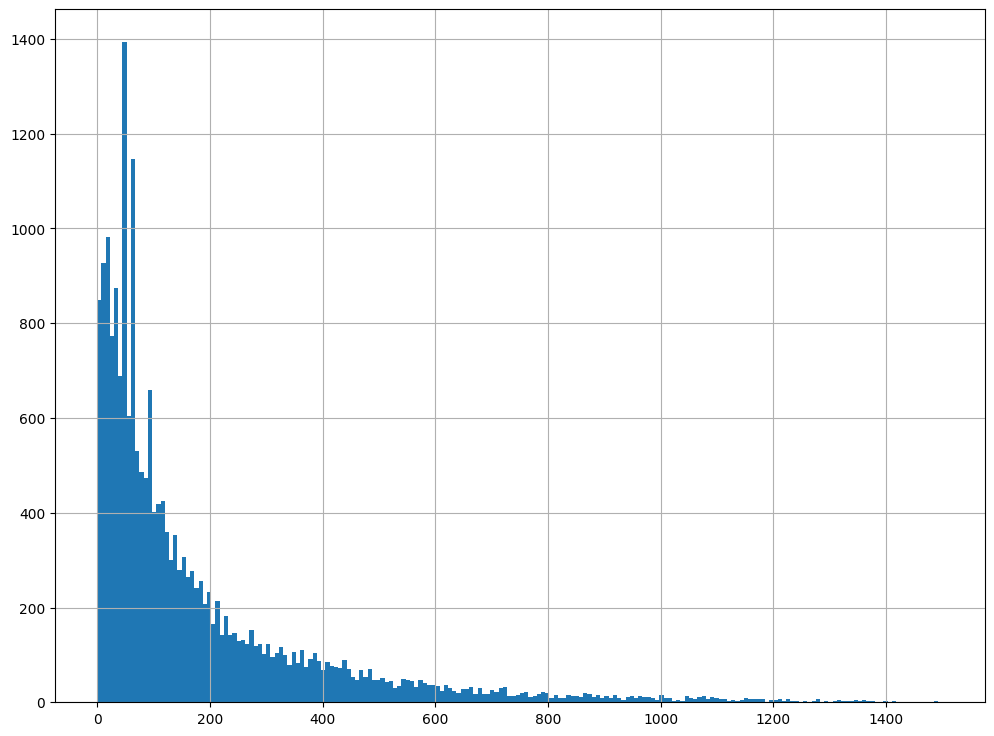

In [32]:
data['days_exposition'].hist(bins=200, range=(0, 1500), figsize=(12, 9))
data['days_exposition'].describe()

 - Медианное значение сроков продажи квартиры - 95 дней
 - Среднее значение сроков продажи квартиры - 180 дней
 - Быстрыми можно считать продажи до 1 месяца
 - Сверхдолгие продажи - от 1,5 лет
 
 ---

**Удаление строк с аномально долгими и подозрительно быстрыми продажами:**
- удаляем продажи до 3х дней, такие объявления похожи на перезалитые
- удаляем продажи более 1200 дней, как выбросы данных

In [33]:
data = data.query('3 < days_exposition < 1200')

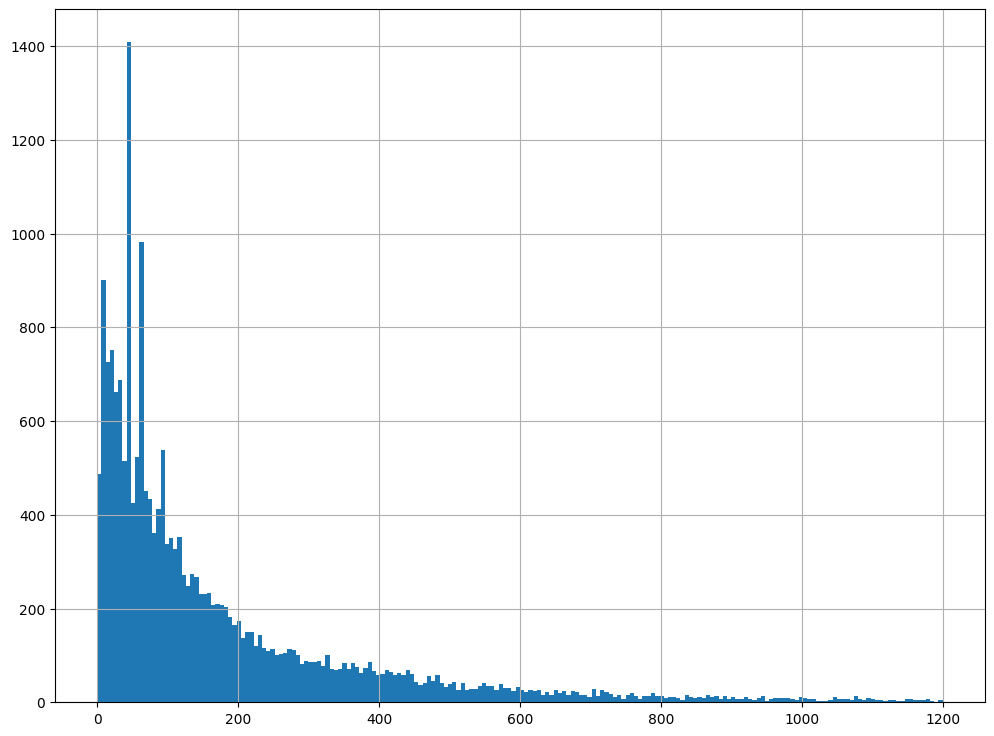

In [34]:
data['days_exposition'].hist(bins=200, range=(0, 1200), figsize=(12, 9));

Максимальная стоимость объекта: 763000000
Минимальная стоимость объекта: 430000


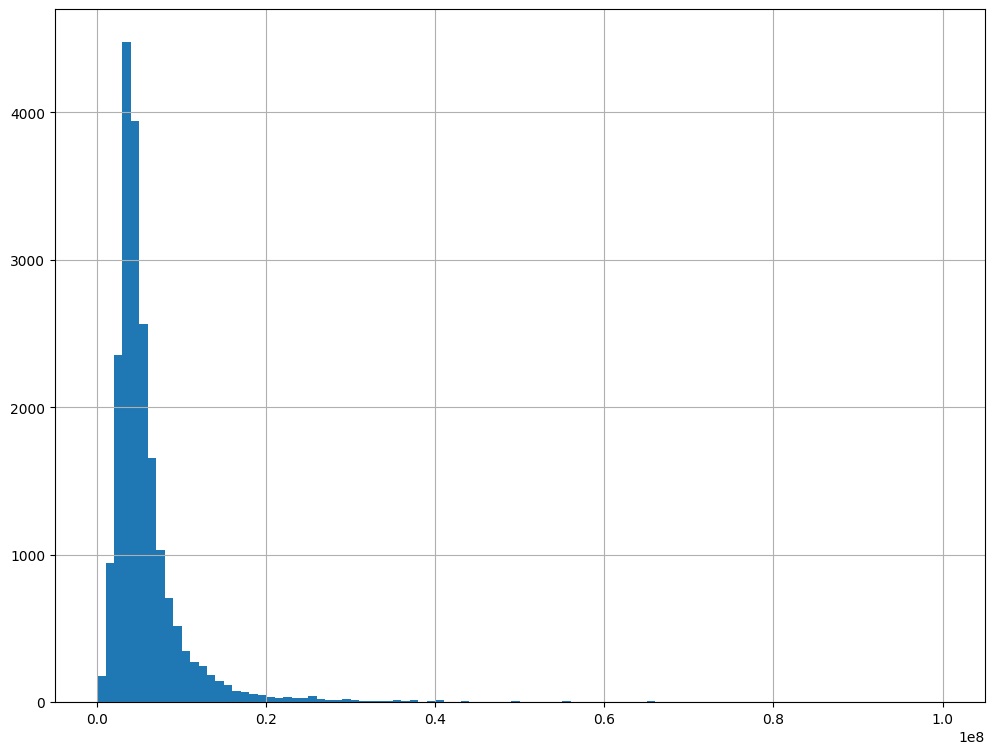

In [35]:
print('Максимальная стоимость объекта:', data['last_price'].max())
print('Минимальная стоимость объекта:', data['last_price'].min())
data['last_price'].hist(bins=100, range=(0, 100000000), figsize=(12, 9));

**Зависимость стоимости жилья от общей площади:**

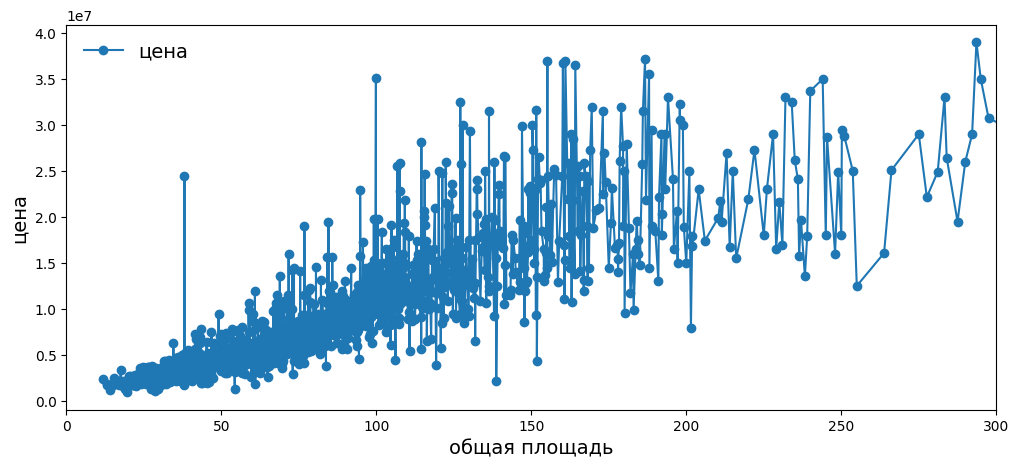

In [36]:
(
     data.query('last_price < 40000000')
    .pivot_table(index='total_area', values='last_price', aggfunc='median')
    .plot(xlim=(0,300), style='o-', figsize=(12,5))
)
plt.legend(['цена'], frameon=False, fontsize=14)
plt.xlabel('общая площадь', fontsize=14)
plt.ylabel('цена', fontsize=14)
plt.show();

In [37]:
data['last_price'].corr(data['total_area'])

0.6433175218726783

- Для объектов общей площадью до 200 квадратных метров наблюдается прямолинейный рост стоимости объекта. Для объектов более 200 кв.м. рост стоимости немного снижается.
- Коэффициент корреляции - 0,65

---

**Зависимость стоимости жилья от жилой площади:**

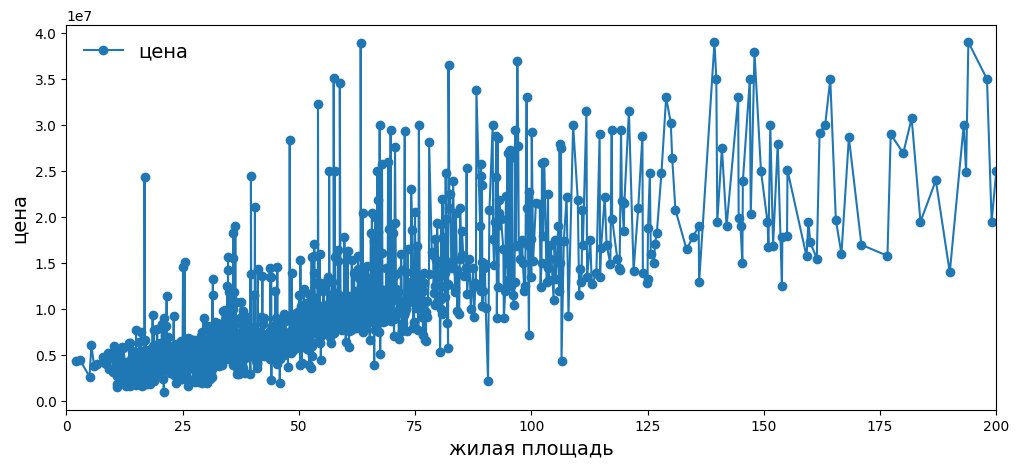

In [38]:
(
     data.query('last_price < 40000000 and ~total_area.isna()')
    .pivot_table(index='living_area', values='last_price', aggfunc='median')
    .plot(xlim=(0,200), style='o-', figsize=(12,5))
)
plt.legend(['цена'], frameon=False, fontsize=14)
plt.xlabel('жилая площадь', fontsize=14)
plt.ylabel('цена', fontsize=14)
plt.show();

In [39]:
data['last_price'].corr(data['living_area'])

0.5571437488875012

- Для объектов с жилой площадью до 125 кв.м. наблюдается прямолинейная зависимость средней стоимости от жилой площади. 
- У объектов с жилой площадью более 125 кв.м. заметна менее явная зависимость роста цены от жилой площади.
- Коэффициент корреляции - 0,56. Говорит о том, что данная зависимость меньше, чем зависимость стоимости от общей площади.

---

**Зависимость стоимости жилья от площади кухни**:

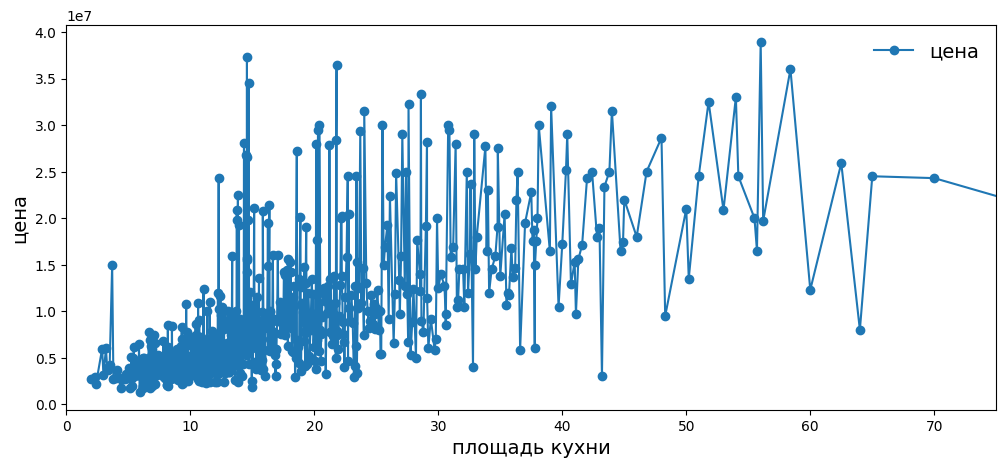

In [40]:
(
     data.query('last_price < 40000000 and ~kitchen_area.isna()')
    .pivot_table(index='kitchen_area', values='last_price', aggfunc='median')
    .plot(xlim=(0,75), style='o-', figsize=(12,5))
)
plt.legend(['цена'], frameon=False, fontsize=14)
plt.xlabel('площадь кухни', fontsize=14)
plt.ylabel('цена', fontsize=14)
plt.show();

In [41]:
data['last_price'].corr(data['kitchen_area'])

0.5105894047510001

- Для объектов с площадью кухни до 40 кв.м. наблюдается прямолинейная зависимость средней стоимости от жилой площади.
- У объектов с площадью кухни более 40 кв.м. практически отсутствует зависимость стоимости от площади кухни.
- Коэффициент корреляции - 0,52. Говорит о том, что данная зависимость достаточно слабая.

___

**Зависимость стоимости жилья от количества комнат:**

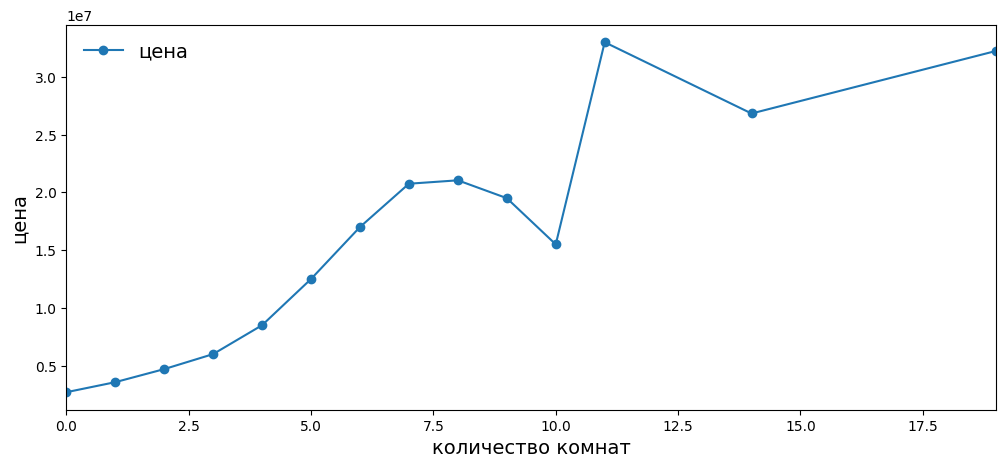

In [42]:
(
     data.query('last_price < 40000000')
    .pivot_table(index='rooms', values='last_price', aggfunc='median')
    .plot(xlim=(0,19), style='o-', figsize=(12,5))
)
plt.legend(['цена'], frameon=False, fontsize=14)
plt.xlabel('количество комнат', fontsize=14)
plt.ylabel('цена', fontsize=14)
plt.show();

In [43]:
data['last_price'].corr(data['rooms'])

0.35348601409631397

- Для объектов с количеством комнат меньше 7 наблюдается экспоненциальная зависимость
- С 7 до 11 комнат зависимость не устанавливается
- Более 11 комнат зависимость становится практически прямолинейной

---

**Зависимость стоимости жилья от высоты потолков:**

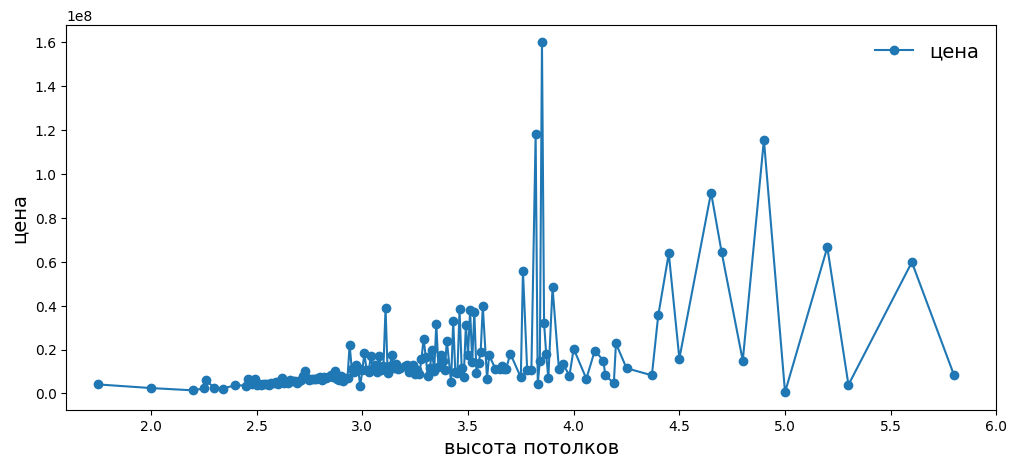

In [44]:
(
     data.query('last_price < 1000000' and '1.6 < ceiling_height < 6')
    .pivot_table(index='ceiling_height', values='last_price', aggfunc='mean')
    .plot(xlim=(1.6, 6), style='o-', figsize=(12,5))
)
plt.legend(['цена'], frameon=False, fontsize=14)
plt.xlabel('высота потолков', fontsize=14)
plt.ylabel('цена', fontsize=14)
plt.show();

- Средняя стоимость жилья немного растет с увеличением высоты потолков. Вероятно влияют квартиры с высокими потолками в Центре Петербурга.

---

**Зависимость стоимости жилья от категории этажа (первый, последний, другой):**

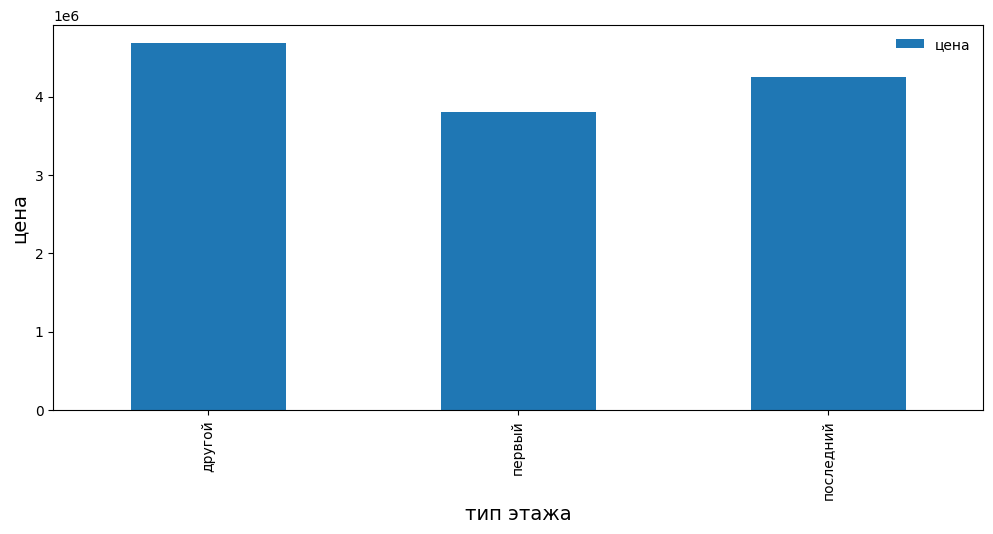

In [45]:
(
     data.query('last_price < 40000000')
    .pivot_table(index='floor_type', values='last_price', aggfunc='median')
    .plot(xlim=(0, 3), kind='bar', figsize=(12,5))
)
plt.legend(['цена'], frameon=False)
plt.xlabel('тип этажа', fontsize=14)
plt.ylabel('цена', fontsize=14)
plt.show();

- Самая низкая стоимость у жилья на первом этаже
- Последние этажи занимают среднюю позицию
- Все остальные дороже всего

---

**Влияние дня недели публикации объявления на стоимость жилья:**

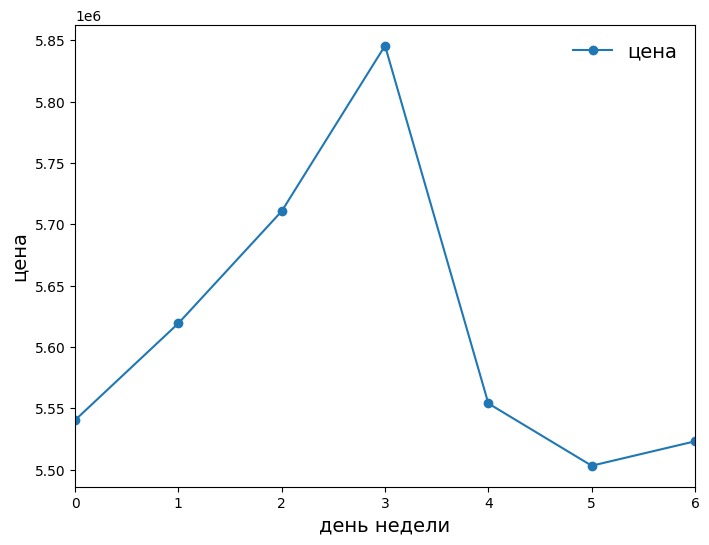

In [46]:
(
     data.query('last_price < 40000000')
    .pivot_table(index='weekday_exposition', values='last_price', aggfunc='mean')
    .plot(xlim=(0, 6), style='o-', figsize=(8,6))
)
plt.legend(['цена'], frameon=False, fontsize=14)
plt.xlabel('день недели', fontsize=14)
plt.ylabel('цена', fontsize=14)
plt.show();

**Влияние месяца публикации объявления на стоимость жилья:**

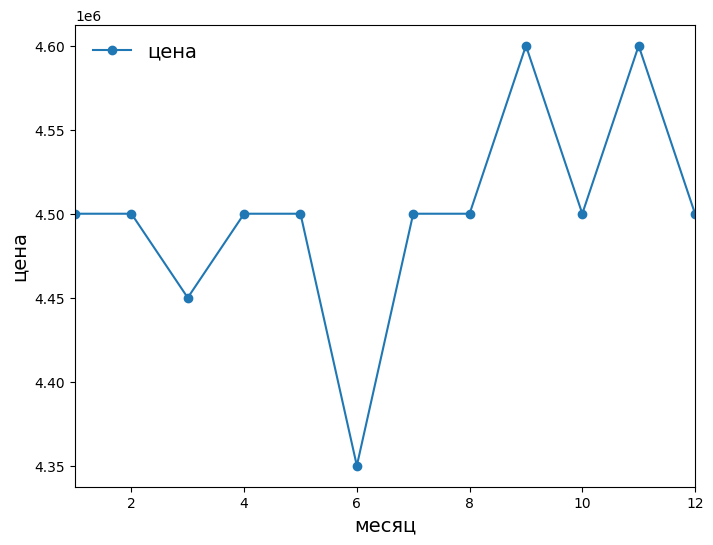

In [47]:
(
     data.query('last_price < 40000000')
    .pivot_table(index='month_exposition', values='last_price', aggfunc='median')
    .plot(xlim=(1, 12), style='o-', figsize=(8,6))
)
plt.legend(['цена'], frameon=False, fontsize=14)
plt.xlabel('месяц', fontsize=14)
plt.ylabel('цена', fontsize=14)
plt.show();

**Влияние года публикации объявления на стоимость жилья:**

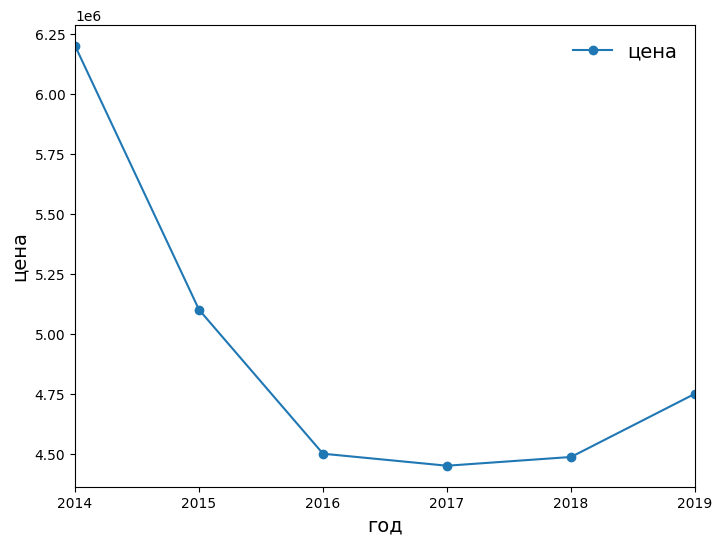

In [48]:
(
     data.query('last_price < 40000000')
    .pivot_table(index='year_exposition', values='last_price', aggfunc='median')
    .plot(xlim=(2014, 2019), style='o-', figsize=(8,6))
)
plt.legend(['цена'], frameon=False, fontsize=14)
plt.xlabel('год', fontsize=14)
plt.ylabel('цена', fontsize=14)
plt.show();

- Объявления опубликованные в середине недели содержат самое дорогое жилье, к концу недели и выходные публикуются самые дешевые варианты
- Самое дорогое жилье начинает продаваться в апреле, а самое дешевое в июне
- с 2016 по 2018 публиковалось самое дешевое жилье, в 2014 было максимальное значение за период, в 2015 почти в два раза упало, к 2019 наблюдается рост публикаций дорогого жилья.

---

**Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**

In [49]:
top_locality = data.pivot_table(index='locality_name', values='price_sq_meter', aggfunc=['count', 'mean'])
top_locality.columns = ['Кол-во лотов', 'Средняя цена']
top_locality['Средняя цена']
top_locality.sort_values('Кол-во лотов', ascending=False).head(10)

,Кол-во лотов,Средняя цена
locality_name,,
Санкт-Петербург,13596,"112,304.0"
Мурино,551,"85,742.8"
Кудрово,440,"94,401.7"
посёлок Шушары,408,"78,009.7"
Всеволожск,338,"68,588.8"
Колпино,308,"74,864.9"
Пушкин,304,"102,092.8"
посёлок Парголово,301,"89,423.6"
Гатчина,268,"67,927.9"


- Самая высокая стоимость квадратного метра жилья в Санкт-Петербурге, Пушкине и Кудрово
- Самые дешевые квадратные метры в Выборге, Всеволожске и Гатчине

In [50]:
spb_at_Center = (
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='to_cityCenter_km', values='last_price', aggfunc=['count', 'mean'])
)
spb_at_Center.columns = ['Кол-во лотов', 'Средняя цена']
spb_at_Center

,Кол-во лотов,Средняя цена
to_cityCenter_km,,
0.0,18,"30,128,004.0"
1.0,162,"19,052,771.6"
2.0,255,"17,743,768.9"
3.0,275,"10,333,628.7"
4.0,575,"13,095,770.9"
5.0,770,"13,821,085.8"
6.0,518,"14,813,827.9"
7.0,347,"13,900,952.5"
8.0,515,"9,392,373.2"


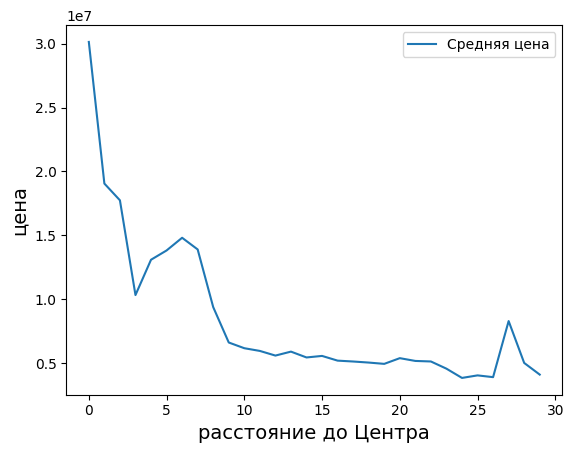

In [51]:
spb_at_Center.plot(y='Средняя цена')
plt.xlabel('расстояние до Центра', fontsize=14)
plt.ylabel('цена', fontsize=14)
plt.show();

- Стоимость жилья в Центре Санкт-Петербурга выше, чем на периферии. 
- Наблюдается всплекс на графике в районе 5-7 км от Центра, который может быть обусловлен продажей жилья в элитных кварталах, например на Крестовском или Каменном острове. 
- Так же в районе 27 км скачок средней цены, вероятно связанный с продажами в Курортном районе.

---

### Напишите общий вывод

***
**Изучив данные сервиса Яндекс Недвижимость и проведя по ним исследовательскую работу, можно сделать следующие выводы:**
***

- **Общая площадь жилья больше всего влияет на рост цены. Жилая площадь, площадь кухни, количество комнат чаще всего напрямую зависят от общей площади, и отдельный вклад влияния на стоимость не несут.**
- **Сильное влияние оказывает то, на каком этаже находится жилье, так первый этаж значительно удешевляет квартиру, примерно на 10% относительно последнего этажа и 20% относительно остальных.**
- **С 2014 г. по 2016 г. наблюдалось резкое падение средней стоимости жилья, далее до 2018 г. были минимальные измениения, затем начался рост. 2014 год был самым пиковым.**
- **В апреле средняя стоимость жилья самая высокая, в июне - самая низкая. в остальные месяцы наблюдается колебание, зимой квартиры в среднем стоят больше, весной и до лета наблюдается спад, который к концу лета выходит на средние показатели.**
- **Объявления опубликованные в середине недели содержат самое дорогое жилье, к концу недели и выходные публикуются самые дешевые варианты.**
- **Самая высокая стоимость квадратного метра жилья в Санкт-Петербурге *(114'829 р/м.кв.)*, Пушкине *(103'125 р/м.кв.)* и Кудрово *(95'324 р/м.кв.)*. 
  Самые дешевые квадратные метры в Выборге *(58'141 р/м.кв.)*, Всеволожске (68'654 р/м.кв.) и Гатчине *(68'745 р/м.кв.)*.**
- **Самая высокая стоимость жилья в Центре Санкт-Петербурга. Она существенно снижается к периферии, за исключением престижных районов.**
- **Быстрыми можно считать продажи до 1 месяца**
- **Сверхдолгие продажи - от 1,5 лет**

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.